## Setup

In [ ]:
from src.data.setup import download_and_extract

download_and_extract(
    url="https://drive.google.com/uc?id=1VAc_MFUAlrtqZanxwYRRtGYVLFunKABf",
    zip_path="data.zip",
    extract_dir="data",
    verbose=True,
    remove_zip=True
)

## Train clfs

DECISION TREE OFFLINE TRAINING - PONG

[1/5] Loading data...
  Total samples: 82682
  Features: ['right_paddle_y', 'ball_x', 'ball_y', 'ball_angle', 'ball_speed', 'y_diff']
  Classes: ['D', 'I', 'U']
  Class distribution:
right_input
I    51262
D    15847
U    15573
Name: count, dtype: int64

[2/5] Splitting data (test_size=0.2)...
  Training samples: 66145
  Test samples: 16537

[3/5] Training Decision Tree...
  Hyperparameters:
    max_depth: 20
    min_samples_split: 10
    min_samples_leaf: 5
  Tree depth: 20
  Number of leaves: 3426

[4/5] Evaluating model...
  Training Accuracy: 0.9404
  Test Accuracy: 0.8928

  Classification Report (Test Set):
              precision    recall  f1-score   support

           D       0.82      0.91      0.86      3169
           I       0.95      0.88      0.92     10253
           U       0.80      0.91      0.85      3115

    accuracy                           0.89     16537
   macro avg       0.86      0.90      0.88     16537
weighted avg  

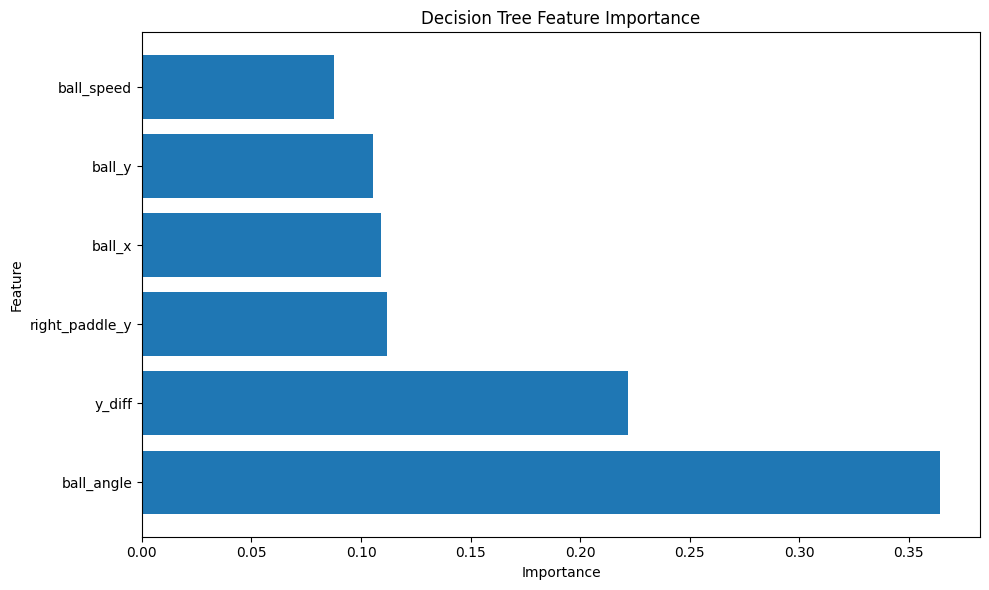

HOEFFDING TREE OFFLINE PRETRAINING - PONG
NOTE: This pretains the model on existing data.
      Online learning during gameplay will be added in next step.

[1/5] Loading data...
  Total samples: 46719
  Features: ['right_paddle_y', 'ball_x', 'ball_y', 'ball_angle', 'ball_speed', 'y_diff']
  Classes: ['D', 'I', 'U']
  Class distribution (balanced):
right_input
D    15573
I    15573
U    15573
Name: count, dtype: int64

[2/5] Splitting data (test_size=0.2)...
  Training samples: 37375
  Test samples: 9344

[3/5] Training Hoeffding Tree (online learning)...
  Hyperparameters:
    grace_period: 50
    delta: 1e-07
    tau: 0.1
    leaf_prediction: nba
    Processed 10000/37375 samples...
    Processed 20000/37375 samples...
    Processed 30000/37375 samples...
  Progressive validation accuracy: 0.6255

[4/5] Evaluating model...
  Training Accuracy: 0.6255
  Test Accuracy: 0.6582

  Classification Report (Test Set):
              precision    recall  f1-score   support

           D       

/Users/julian/workspace/pwr/ml/mlproj/venv/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/julian/workspace/pwr/ml/mlproj/venv/lib/python3.13/site-packages/numpy/_core/_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Remove Cell 1 because of simiarity
Removed Cell because of inactivity 0.0
Removed Cell because of inactivity 0.0
Removed Cell because of inactivity 0.0
Removed Cell because of inactivity 0.0
Removed Cell because of inactivity 0.0
Removed Cell because of inactivity 0.0
Removed Cell because of inactivity 0.0
Removed Cell because of inactivity 0.0
Removed Cell because of inactivity 0.0
Removed Cell because of inactivity 0.0
Removed Cell because of inactivity 0.0
Removed Cell because of inactivity 0.0
Removed Cell because of inactivity 0.0
Removed Cell because of inactivity 0.0
Removed Cell because of inactivity 0.0
Removed Cell because of inactivity 0.0
Remove Cell 2 because of simiarity
Removed Cell because of inactivity 0.0
Removed Cell because of inactivity 0.0
Removed Cell because of inactivity 0.0
Removed Cell because of inactivity 0.0
Removed Cell because of inactivity 0.0
Removed Cell because of inactivity 0.0
Removed Cell because of inactivity 0.0
Removed Cell because of inactivit

In [1]:
from src.models.decision_tree.train import main as train_decision_tree
from src.models.hoeffding.train import main as train_hoeffding_tree
from src.models.weighted_forest.train import main as train_weighted_forest

train_decision_tree()
train_hoeffding_tree()
train_weighted_forest()

## Launch game

In [ ]:
from src.main import main

mode = "ct" # choices: "human", "pc", "dt", "ht", "ct"
main(mode)

## Evaluate Models

In [2]:
from src.evaluation import evaluate_all_models

results = evaluate_all_models(max_score=3)

print("\n" + "="*50)
print("SUMMARY")
print("="*50)
for model_name, result in results.items():
    print(f"{model_name.upper()}: {result.survival_time_seconds:.2f}s, "
          f"Score {result.final_pc_score}-{result.final_ai_score}, "
          f"Hits: {result.total_hits}")


Evaluating Decision Tree...

Evaluation Results: DT
Survival Time: 20.43s (1226 frames)
Final Score: PC 3 - 0 AI
Total Ball Hits by AI: 3


Evaluating Hoeffding Tree...

Evaluation Results: HT
Survival Time: 20.43s (1226 frames)
Final Score: PC 3 - 0 AI
Total Ball Hits by AI: 3


Evaluating Weighted Forest...

Evaluation Results: CT
Survival Time: 20.43s (1226 frames)
Final Score: PC 3 - 0 AI
Total Ball Hits by AI: 3


SUMMARY
DT: 20.43s, Score 3-0, Hits: 3
HT: 20.43s, Score 3-0, Hits: 3
CT: 20.43s, Score 3-0, Hits: 3
